<a href="https://colab.research.google.com/github/FelipeaACamargo/ClassificacaoBinaria_ArvoreDecisao_Diabetes/blob/main/Diabetes_ClassificacaoBinaria_ArvoreDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação Binária - Algoritmo de Árvore de Decisão - Dados de Diabetes

Usaremos um conjunto de dados que é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo é prever, com base em medições diagnósticas, se um paciente **tem diabetes ou não**.

O arquivo está nomeado como Diabetes.xlsx nele contém nove colunas, separadas em variáveis explicativas e a variável rótulo, conforme as descrições abaixo:

  - **Gravidez:** Número de vezes que engravidaram
  - **Glicose:** Concentração plasmática de glicose em 2 horas em um teste oral de tolerância à glicose
  - **Pressão Arterial:** Pressão arterial diastólica (mm Hg)
  -  **Espessura da Pele:** Espessura da prega cutânea (pele) do tríceps (mm)
  -  **Insulina:** Insulina sérica de 2 horas
  -  **IMC:** Índice de massa corporal (peso em kg/(altura em m)$^2$)
  -  **Diabetes-Pedigree:** Função de pedigree do diabetes
  -  **Idade:** Idade (anos)
  -  **Diabetes:** Variável Rótulo (0 ou 1)

\
Esse é um problema de Aprendizado de Máquina Supervisionado do tipo Classificação Binária, então use o algoritmo de Árvore de Decisão (que também é utilizado para Multiclasse) para resolver esse problema.


---


Passos: Importação das bibliotecas, importação do banco de dados, análise descritiva simples, matriz de correlação, divisão do banco em treinamento e teste, previsão do modelo, medidas de desempenho (acurácia e matriz de confusão), árvore de decisão e gráfico das variáveis significativas para árvore de decisão.



---


**Respondam às Perguntas sobre o código:**

    1. Quais são as variáveis que têm a maior correlação com o resultado(coluna 'Resultado')?

    2. Qual foi a acurácia em porcentagem deste modelo? E como você classifica essa acurácia? Justifique.

    3.  Como interpretar a matriz de confusão? O que significam os valores na diagonal e fora da diagonal?

    4. O que significa uma curva ROC mais próxima do canto superior esquerdo? E o que o valor da AUC nos diz? Qual foi o valor da curva de ROC para esse modelo?

    5. Quais são as três variáveis que têm maior impacto no modelo de árvore de decisão? E as três que têm o menor impacto?


## 1. Importação das Bibliotecas


- **pandas** para manipulação de dados

- **matplotlib** e seaborn para visualização

- **Módulos da scikit-learn** para modelagem, avaliação, e visualização da árvore de decisão

In [ ]:
# Importação da bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_curve, auc


## 2. Análise Descritiva



As funções como **display**, **info** e **describe** permitem entender as dimensões, qualidade e estatísticas básicas do *dataset*, ajudando a identificar possíveis valores ausentes ou *outliers*.

In [ ]:
#Importando o banco de dados
baseDados = pd.read_excel('Diabetes.xlsx') # Carregando um arquivo excel .xlsx


display(baseDados) # Exibindo os dados - display é mais estilizado que o print
print("\n\n")
baseDados.info() # Informações sobre os dados
print("\n\n")
baseDados.describe() # Informações estatísticas dos dados

,Gravidezes,Glicose,Pressão Arterial,Espessura da Pele,Insulina,IMC,Diabetes-Pedigree,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2288.000,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gravidezes          768 non-null    int64  
 1    Glicose            768 non-null    int64  
 2    Pressão Arterial   768 non-null    int64  
 3    Espessura da Pele  768 non-null    int64  
 4    Insulina           768 non-null    int64  
 5    IMC                768 non-null    float64
 6    Diabetes-Pedigree  768 non-null    float64
 7    Idade              768 non-null    int64  
 8    Resultado          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB





,Gravidezes,Glicose,Pressão Arterial,Espessura da Pele,Insulina,IMC,Diabetes-Pedigree,Idade,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,81.627618,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,327.912860,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


## 3. **Matriz de Correlação**

Verifica a relação entre as **variáveis explicativas** e o **resultado**, além de identificar multicolinearidade.



---


A matriz de correlação, plotada com um **heatmap**, permite descobrir relações mais fortes entre as variáveis explicativas e o resultado.

Assim, podemos visualizar rapidamente quais atributos têm associação mais próxima com o desenvolvimento do diabetes, facilitando a análise exploratória e futura seleção de variáveis.

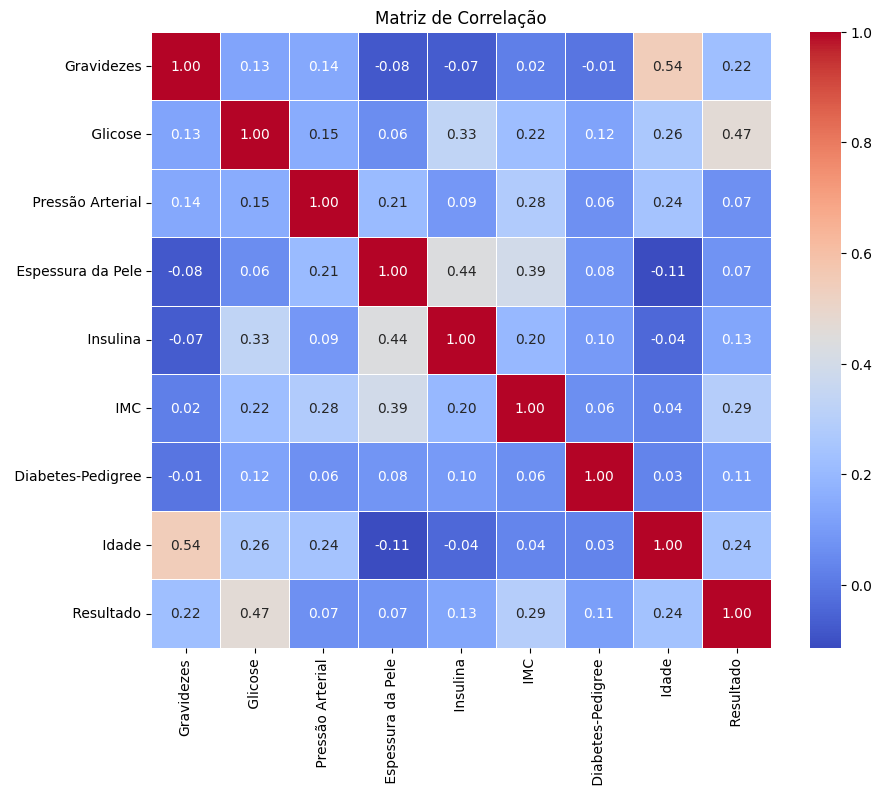

In [ ]:
# Matriz de correlação
correlacao = baseDados.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap = 'coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

## 4. Divisão, Treino e Teste


---

- Os dados são separados em variáveis explicativas (X) e rótulo (y).

- O conjunto é dividido em treino (80%) e teste (20%) para avaliar o desempenho real do modelo.

- Um modelo de árvore de decisão com profundidade máxima de 4 é treinado nos dados de treino.

In [ ]:
# Dividindo os dados em conjunto de treino e teste
X = baseDados.iloc[:, 0:8].values
y = baseDados.iloc[:, 8].values

# Exibi as primeiras linhas de X em formato de DataFrame
df_X = pd.DataFrame(X, columns=['Gravidezes','Glicose', 'Pressão Arterial',  'Espessura da Pele',  'Insulina', 'IMC',  'Diabetes-Pedigree', 'Idade'])
print("Primeiras linhas de X (Variáveis Explicativas):")
display(df_X.head())

print("\n\n")

# Exibi as primeiras linhas de y em formato de DataFrame
df_y = pd.DataFrame(y, columns=['Resultado'])
print("Primeiras linhas de y (Variáveis Rótulo):")
display(df_y.head())

# Dividindo em treino (80%) e teste (20%)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 2)


# Criando o modelo de árvore de decisão
modelo = DecisionTreeClassifier(random_state = 42, max_depth=4) # Limita a profundidade para 4 níveis da árvore
modelo.fit(X_treino, y_treino) # treinamento

# Previsões
y_previsao= modelo.predict(X_teste)

Primeiras linhas de X (Variáveis Explicativas):


,Gravidezes,Glicose,Pressão Arterial,Espessura da Pele,Insulina,IMC,Diabetes-Pedigree,Idade
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2288.000,33.0





Primeiras linhas de y (Variáveis Rótulo):


,Resultado
0,1
1,0
2,1
3,0
4,1


## 5. Medidas de Desempenho


---


* Previsão e Medidas de Desempenho
  - Com o modelo ajustado, serão realizadas previsões para o conjunto de teste.

  - Acurácia, relatório de classificação (precision, recall, f1-score) e matriz de confusão são calculadas para avaliar o desempenho geral e detalhado.

  - A matriz de confusão (destacada também com seaborn) ilustra quantos casos reais o modelo acertou e errou para cada classe.


---


* Curva ROC e AUC
  - A curva ROC (*Receiver Operating Characteristic*) mostra a relação entre taxa de verdadeiros positivos e falsos positivos em vários limiares de decisão.

  - O valor AUC (área sob a curva) representa a capacidade do modelo em separar as classes: quanto mais próximo de 1, melhor.


---


* Visualização da Árvore de Decisão
  - O modelo treinado pode ser visualizado, exibindo seus nós e critérios de decisão, mostrando como as variáveis influenciam a classificação final.


---


* Importância das Variáveis
  - O gráfico final aponta, na visão da árvore de decisão treinada, quais atributos mais influenciaram a decisão do modelo.

### 5.1 Acurácia

In [ ]:
Acuracia = accuracy_score(y_teste, y_previsao)
print(f"Acurácia: {Acuracia:.2f}")
print(classification_report(y_teste, y_previsao, target_names=['Não', 'Sim']))

Acurácia: 0.75
              precision    recall  f1-score   support

         Não       0.84      0.80      0.82       109
         Sim       0.56      0.62      0.59        45

    accuracy                           0.75       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.76      0.75      0.75       154



### 5.2 Matriz de Confusão

Acurácia: 0.75


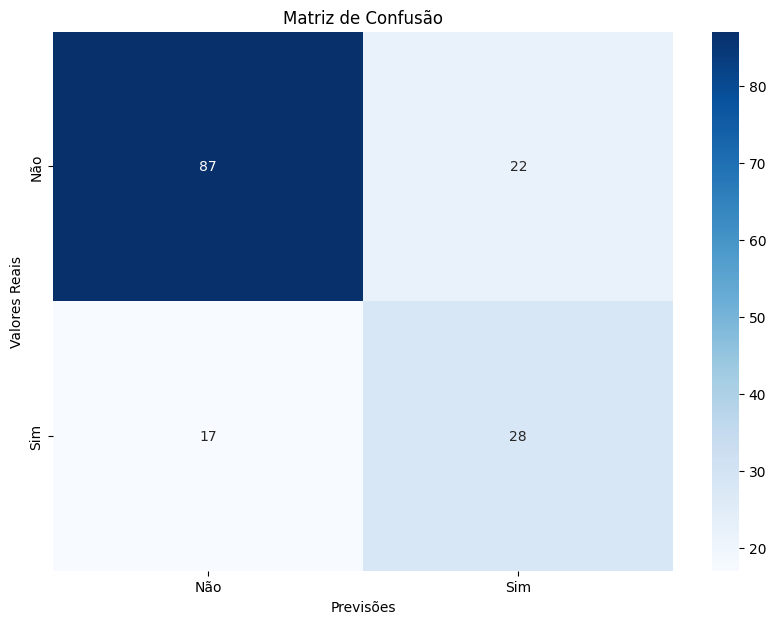

In [ ]:
matriz_confusao = confusion_matrix(y_teste, y_previsao)

# Opcional - pode trocar por print(matriz_confusao)
plt.figure(figsize=(10, 7))
# Use the unique values from your target variable (y) as labels
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
print(f"Acurácia: {Acuracia:.2f}")
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

### 5.3 Curva de ROC

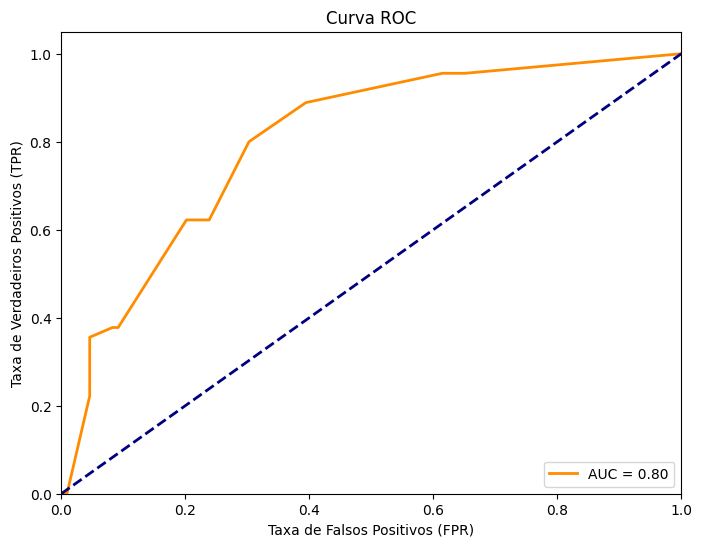

In [ ]:
# Calcular probabilidades de previsão
y_prob = modelo.predict_proba(X_teste)[:, 1]  # Probabilidade de classe positiva (1)
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_prob)
roc_auc = auc(fpr, tpr)
# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### 5.4 Árvore de Decisão

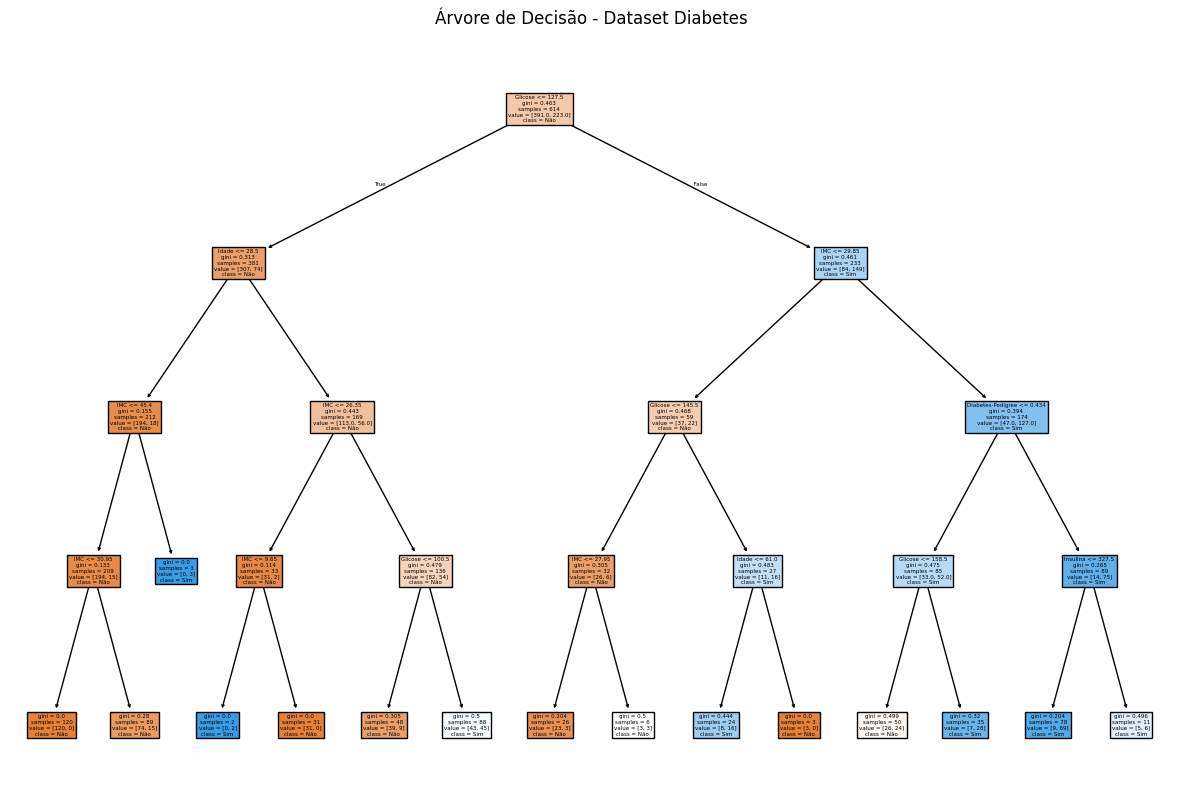

In [ ]:
# Plotando a Árvore de Decisão
Nomes_Colunas = ['Gravidezes','Glicose', 'Pressão Arterial',  'Espessura da Pele',  'Insulina', 'IMC',  'Diabetes-Pedigree', 'Idade']
plt.figure(figsize=(15, 10)) # Define o tamanho da figura
plot_tree(modelo, feature_names = Nomes_Colunas, class_names = ['Não', 'Sim'], filled = True) # descrição acima
plt.title("Árvore de Decisão - Dataset Diabetes")
plt.show() # Exibe o gráfico da árvore de decisão.

### 5.5 Variáveis significativas para árvore de decisão

/tmp/ipython-input-4040555007.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancia_variaveis, y=importancia_variaveis.index, palette="viridis")


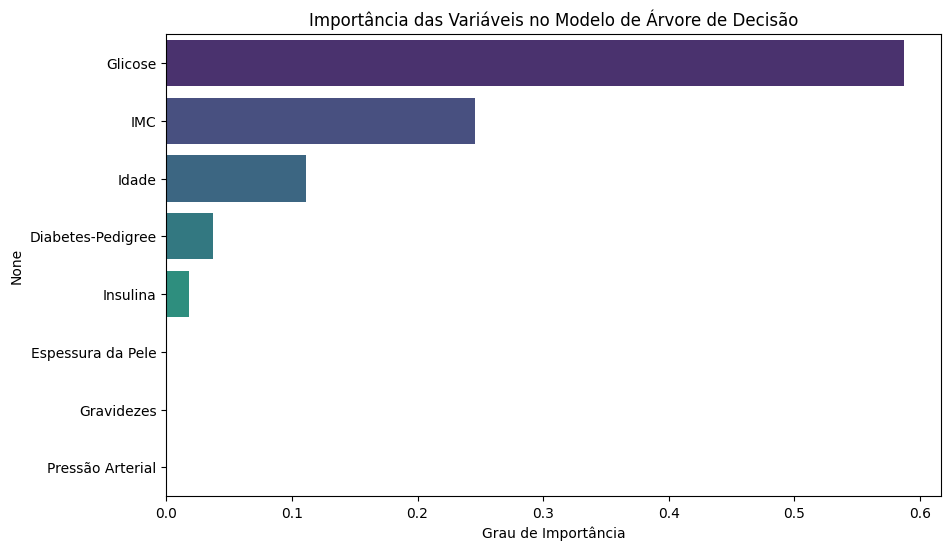

In [ ]:
# Importância das variáveis
importancia_variaveis = pd.Series(modelo.feature_importances_, index=Nomes_Colunas)
importancia_variaveis = importancia_variaveis.sort_values(ascending=False)

print("\n\n")

plt.figure(figsize=(10, 6))
sns.barplot(x=importancia_variaveis, y=importancia_variaveis.index, palette="viridis")
plt.title("Importância das Variáveis no Modelo de Árvore de Decisão")
plt.xlabel("Grau de Importância")
plt.show()


# Respostas às Perguntas

1. Quais variáveis têm maior correlação com o resultado ('Diabetes')?

Essas informações aparecem na **matriz de correlação** (correlacao['Diabetes']), que apresenta para cada variável o grau de associação com o diagnóstico de diabetes.

As variáveis como 'Glicose', 'IMC' e 'Diabetes-Pedigree' apresentam as maiores correlações positivas, mas a **variável GLICOSE tem a maior correlação com o resultado**.


---


2. Qual foi a acurácia deste modelo? Como classificá-la?


A acurácia calculada (exibida pelo print) representa a proporção de acertos do modelo no teste.

A Acurácia foi de  0.75, isso significa 75% de acerto.

Essa acurácia pode ser considerada razoável — melhor do que um palpite aleatório (50%), mas pode não ser suficiente para aplicações médicas críticas. Sempre compare também outras métricas, como recall (especialmente para a classe 1).



---


3. Como interpretar a matriz de confusão? O que significam os valores na diagonal e fora dela?


Na matriz de confusão:

- Valores na diagonal (de cima à esquerda para baixo à direita) correspondem a casos corretamente classificados (verdadeiros positivos e verdadeiros negativos).

- Valores fora da diagonal representam erros:

  * Falsos positivos (casos não-diabéticos classificados como diabéticos)

  * Falsos negativos (casos diabéticos classificados como não-diabéticos)

- Os maiores valores devem estar na diagonal para indicar bom desempenho do modelo.



---


4. O que significa uma curva ROC mais próxima do canto superior esquerdo? O que diz a AUC? Qual foi o valor da AUC?

* Uma curva ROC próxima do canto superior esquerdo indica alta taxa de verdadeiros positivos e baixa taxa de falsos positivos — ou seja, melhor performance.

* AUC (Área sob a Curva) indica a "separabilidade" do modelo: quanto mais alta, melhor; valor de 0.5 equivale ao acaso, valor 1 é perfeito.

O valor da AUCé de 0.80 — quanto mais próximo de 1, melhor o modelo diferencia as classes.



---


5. Quais são as três variáveis de maior impacto? E as de menor impacto?

O gráfico final de importância das variáveis mostra esse ranking.

* As váriaveis Glicose, IMC e Pedigree de Diabetes aparecem no topo, sendo a  variáveis de maior impacto.

* As de menor impacto (menor valor no gráfico) são, Espessura da Pele, Insulina e Idade.


---

